In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import h5py
import numpy as np
import os

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
# load data
data = h5py.File("../../Data/EC2_blocks_1_8_9_15_76_89_105_CV_HG_align_window_-0.5_to_0.79_file_nobaseline.h5")
X_data = data['Xhigh gamma'][:]
y_data = data['y'][:] # phoneme label

In [5]:
# preprocessing
X_data = np.divide(X_data, np.amax(X_data)) # normalize ECoG signal

In [6]:
# sort by phonemes
sort_order = y_data.argsort() # sort by phonemes
X_data = X_data[sort_order]
y_data = y_data[sort_order]

In [7]:
# calculate averages for each phoneme
X_averages = []
for phoneme in range(max(y_data)):
    indices = [y_data == phoneme]
    X_averages.append(np.mean(X_data[indices], axis=0))

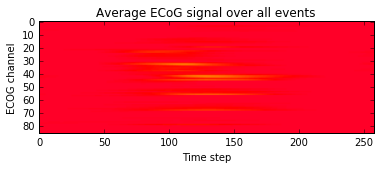

In [12]:
# plot average of averages
X_totalAverage = np.mean(X_averages, axis=0)
plt.imshow(X_totalAverage, cmap=cm.gist_rainbow, vmin=0, vmax=1)
plt.title("Average ECoG signal over all events")
plt.xlabel("Time step")
plt.ylabel("ECOG channel")
directory = "Plots/Channels/"
if not os.path.exists(directory): os.makedirs(directory)
plt.savefig(directory + "All.pdf", bbox_inches="tight")

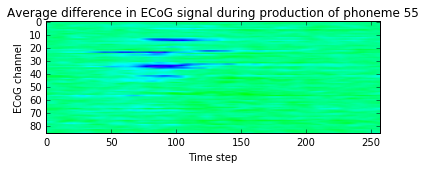

In [13]:
# plot differences between phoneme averages and total average
for phoneme in range(max(y_data)):
    plt.imshow(X_averages[phoneme] - X_totalAverage, cmap=cm.gist_rainbow, vmin=-0.2, vmax=0.2)
    plt.title("Average difference in ECoG signal during production of phoneme " + str(phoneme))
    plt.xlabel("Time step")
    plt.ylabel("ECoG channel")
    directory = "Plots/Channels/"
    if not os.path.exists(directory): os.makedirs(directory)
    plt.savefig(directory + "Phoneme" + str(phoneme) + ".pdf", bbox_inches="tight")

In [14]:
# find most significant channel differences
averageChannelSum = np.sum(X_totalAverage, axis=1)
channelSums = []
for phoneme in range(max(y_data)):
    if (len(channelSums) == 0):
        channelSums = np.sum(np.absolute(X_averages[phoneme] - X_totalAverage), axis=1)
    else:
        channelSums = np.vstack((channelSums, (np.sum(np.absolute(X_averages[phoneme] - X_totalAverage), axis=1)))) # total absolute difference per channel
channelSums = np.transpose(channelSums)
channelSums = channelSums - np.amin(channelSums)
channelSums = np.divide(channelSums, np.amax(channelSums)) # normalizing
tempSums = np.sum(channelSums, axis=1)
bestN = 10 # find 10 best channels
bestChannels = np.argpartition(tempSums, -bestN)[-bestN:]
bestChannels = bestChannels[np.argsort(tempSums[bestChannels])]
print bestChannels

[34 27 37 36 25 38 42 33 24 23]


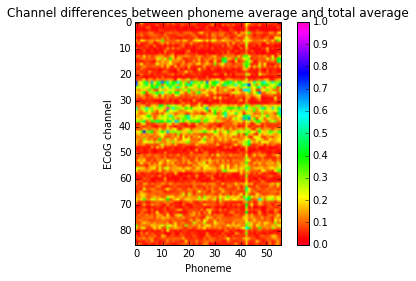

In [15]:
# plot channel differences
plt.imshow(channelSums, cmap=cm.gist_rainbow, vmin=0, vmax=1)
plt.colorbar() # plot color bar
plt.title("Channel differences between phoneme average and total average")
plt.xlabel("Phoneme")
plt.ylabel("ECoG channel")
directory = "Plots/Channels/"
if not os.path.exists(directory): os.makedirs(directory)
plt.savefig(directory + "ChannelDifferences.pdf", bbox_inches="tight")

In [16]:
import pymf